# Summary

This file plots impulse responses to an unexpected fall in the fertility rate and increase in life expectancy. The simulations were created in the file `GJLS_model_IRF.ipynb`. These simulations were prepared in response to referees. 

## A. Shock to the fertility rate

In [1]:
# Loading packages and type definitions
using JLD, Plots, LinearAlgebra, Printf, DelimitedFiles
include("typedefs.jl");

# Loading simulation results
IRF_FR_Imp_beg = 361;      # Period number, start of surprises
IRF_FR_Imp_end = 420;      # Period number, end of surprises

# Loading no-shock baseline
filename0 = "../Rstar_sims/IRF_FR_RW.jld"
mylabel0 = "No shock (perfect foresight)"
solution_NOIRF = load(filename0, "solution_NOIRF")
pars_NOIRF = load(filename0, "pars_NOIRF")
simpars_NOIRF = load(filename0, "simpars_NOIRF")
data_NOIRF = load(filename0, "data_NOIRF")
Population_NOIRF = load(filename0, "Population_NOIRF"); 

# Loading simulation with random-walk expectations
filename1 = "../Rstar_sims/IRF_FR_RW.jld"
mylabel1 = "Random-walk expectations"
solution_IRF1 = load(filename1, "solution_IRF")
pars_IRF1 = load(filename1, "pars_IRF")
simpars_IRF1 = load(filename1, "simpars_IRF")
data_IRF1 = load(filename1, "data_IRF")
Population_IRF1 = load(filename1, "Population_IRF"); 

# Loading simulation with autoregressive expectations
filename2 = "../Rstar_sims/IRF_FR_AR1.jld"
mylabel2 = "AR(1) expectations"
solution_IRF2 = load(filename2, "solution_IRF")
pars_IRF2 = load(filename2, "pars_IRF")
simpars_IRF2 = load(filename2, "simpars_IRF")
data_IRF2 = load(filename2, "data_IRF")
Population_IRF2 = load(filename2, "Population_IRF"); 

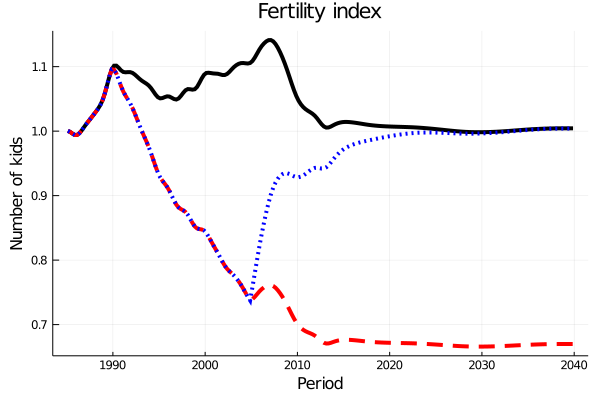

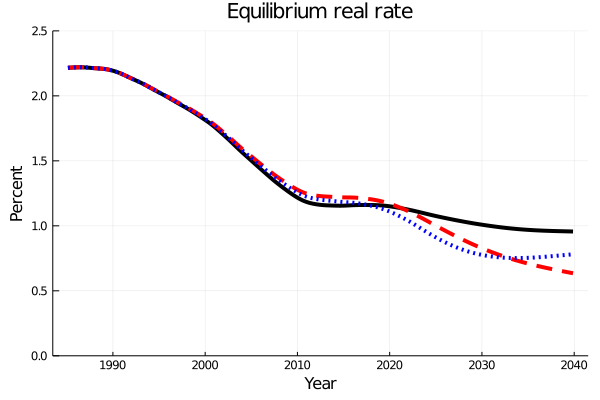

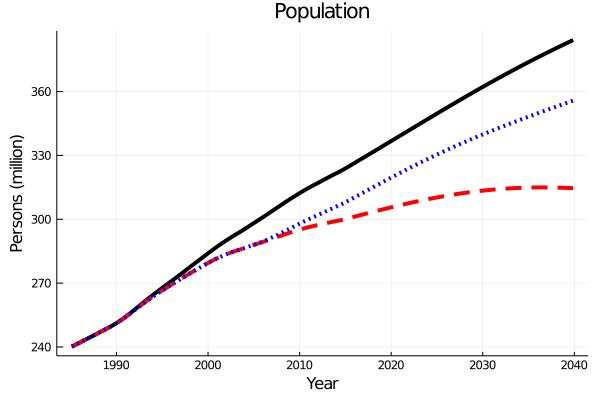

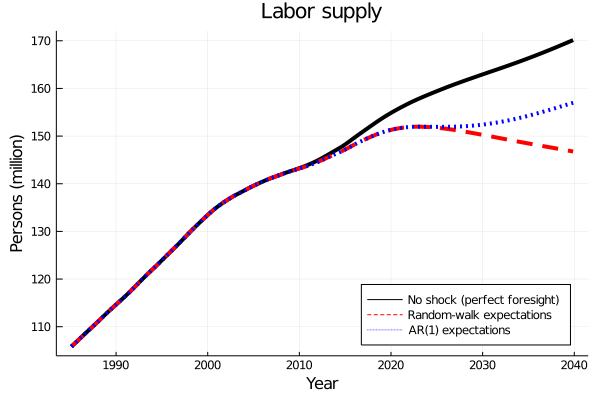

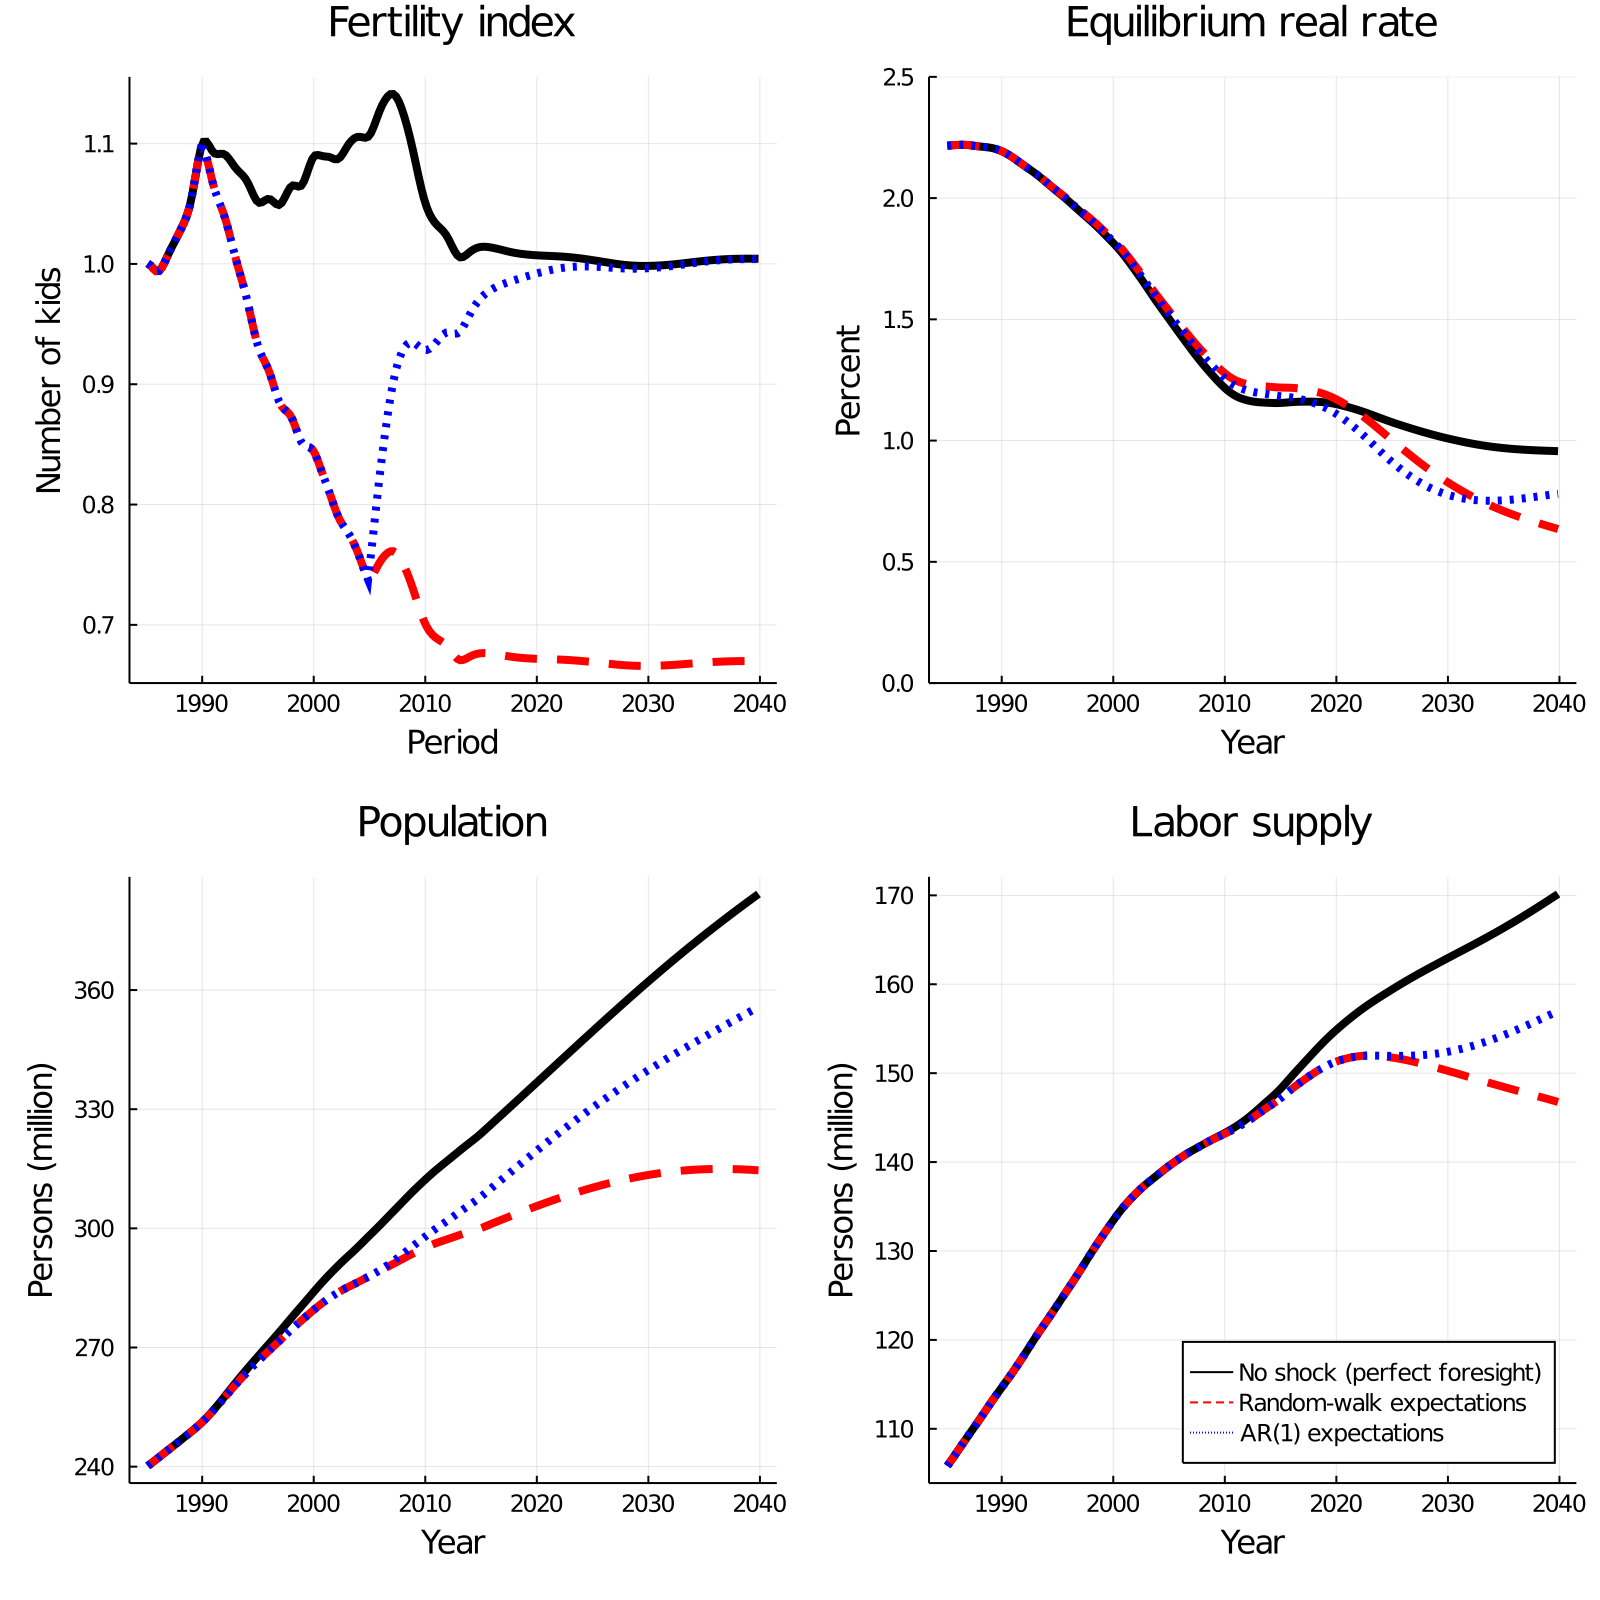

In [44]:
# Period indices
ageQ = 0.125:0.25:120;
periodQ = 1900.125:0.25:2400;
myper = (IRF_FR_Imp_beg-20):(IRF_FR_Imp_end+140)

# Fertility index
scalingfactor = sum(sum(data_NOIRF.fertility_rate[:,IRF_FR_Imp_end+81:IRF_FR_Imp_end+100],dims=1))/20

figFR=plot(periodQ[myper], [sum(data_NOIRF.fertility_rate[:,myper],dims=1)' sum(data_IRF1.fertility_rate[:,myper],dims=1)'  sum(data_IRF2.fertility_rate[:,myper],dims=1)']/scalingfactor,
    xlabel = "Period",
    ylabel = "Number of kids",
    title = "Fertility index",
    label = "",
#    label = [mylabel0 mylabel1 mylabel2],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    linewidth = [4 4 4],
    legend =:bottomright
)
display(figFR)

# Check equilibrium interest rate
figARR=plot(periodQ[myper], [solution_NOIRF.ARR[myper] solution_IRF1.ARR[myper] solution_IRF2.ARR[myper]],
    xlabel = "Year",
    ylabel = "Percent",
    title = "Equilibrium real rate",
    label = "",
#    label = [mylabel0 mylabel1 mylabel2],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    ylims=(0.0, 2.5),
    linewidth = [4 4 4],
    legend =:topright
)
display(figARR)

figPOP=plot(periodQ[myper], [sum(Population_NOIRF,dims=1)[myper] sum(Population_IRF1,dims=1)[myper] sum(Population_IRF2,dims=1)[myper]]/1000000,
    xlabel = "Year",
    ylabel = "Persons (million)",
    title = "Population",
    label = "",
#    label = [mylabel0 mylabel1 mylabel2],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    linewidth = [4 4 4],
    legend =:bottomright
)
display(figPOP)

figL=plot(periodQ[myper], [solution_NOIRF.L[myper] solution_IRF1.L[myper] solution_IRF2.L[myper]]/1000000,
    xlabel = "Year",
    ylabel = "Persons (million)",
    title = "Labor supply",
    label = [mylabel0 mylabel1 mylabel2],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    linewidth = [4 4 4],
    legend =:bottomright
)
display(figL)

figall = plot(figFR, figARR, figPOP, figL, layout=(2, 2),size = (800, 800), dpi=200)
display(figall)
savefig(figall, "../Figures/Figure_FR_IRF_all.png")

writedlm("../Figures/Figure_FR_IRF_all.csv", 
    [[sum(data_NOIRF.fertility_rate[:,myper],dims=1)' sum(data_IRF1.fertility_rate[:,myper],dims=1)' sum(data_IRF2.fertility_rate[:,myper],dims=1)']/scalingfactor
     [solution_NOIRF.ARR[myper] solution_IRF1.ARR[myper] solution_IRF2.ARR[myper]]
    [sum(Population_NOIRF,dims=1)[myper] sum(Population_IRF1,dims=1)[myper] sum(Population_IRF2,dims=1)[myper]]/1000000
    [solution_NOIRF.L[myper] solution_IRF1.L[myper] solution_IRF2.L[myper]]/1000000]
    , ',');
run(`chmod 664 ../Figures/Figure_FR_IRF_all.csv`);


## B. Shock to life expectancy

In [10]:
# Loading packages and type definitions

# Loading simulation results
IRF_LE_beg = 341;      # Period number, start of surprises
IRF_LE_end = 480;      # Period number, end of surprises
IRF_LE_tgt = 680;      # Period number, target mortality rates at end of surprise 

# Loading no-shock baseline
filename5 = "../Rstar_sims/IRF_LE.jld"
mylabel5 = "Baseline"
solution_NOIRF5 = load(filename5, "solution_NOIRF")
pars_NOIRF5 = load(filename5, "pars_NOIRF")
simpars_NOIRF5 = load(filename5, "simpars_NOIRF")
data_NOIRF5 = load(filename5, "data_NOIRF")
Population_NOIRF5 = load(filename5, "Population_NOIRF"); 

# Loading simulation with random-walk expectations
filename6 = "../Rstar_sims/IRF_LE.jld"
mylabel6 = "Shock"
solution_IRF6 = load(filename6, "solution_IRF")
pars_IRF6 = load(filename6, "pars_IRF")
simpars_IRF6 = load(filename6, "simpars_IRF")
data_IRF6 = load(filename6, "data_IRF")
Population_IRF6 = load(filename6, "Population_IRF"); 

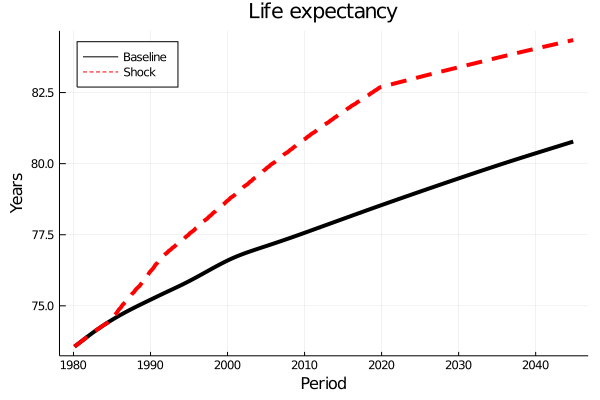

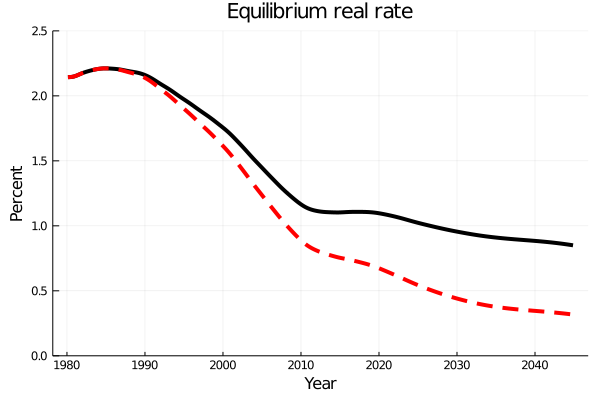

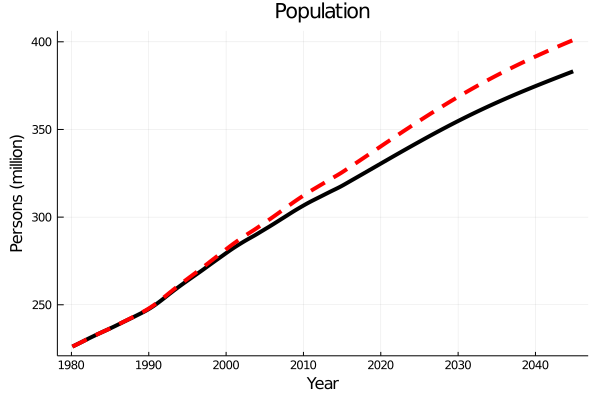

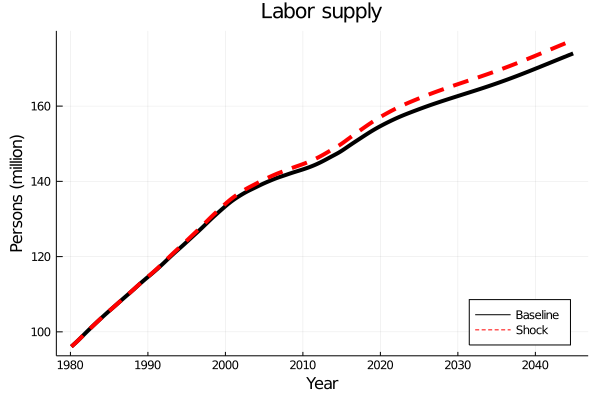

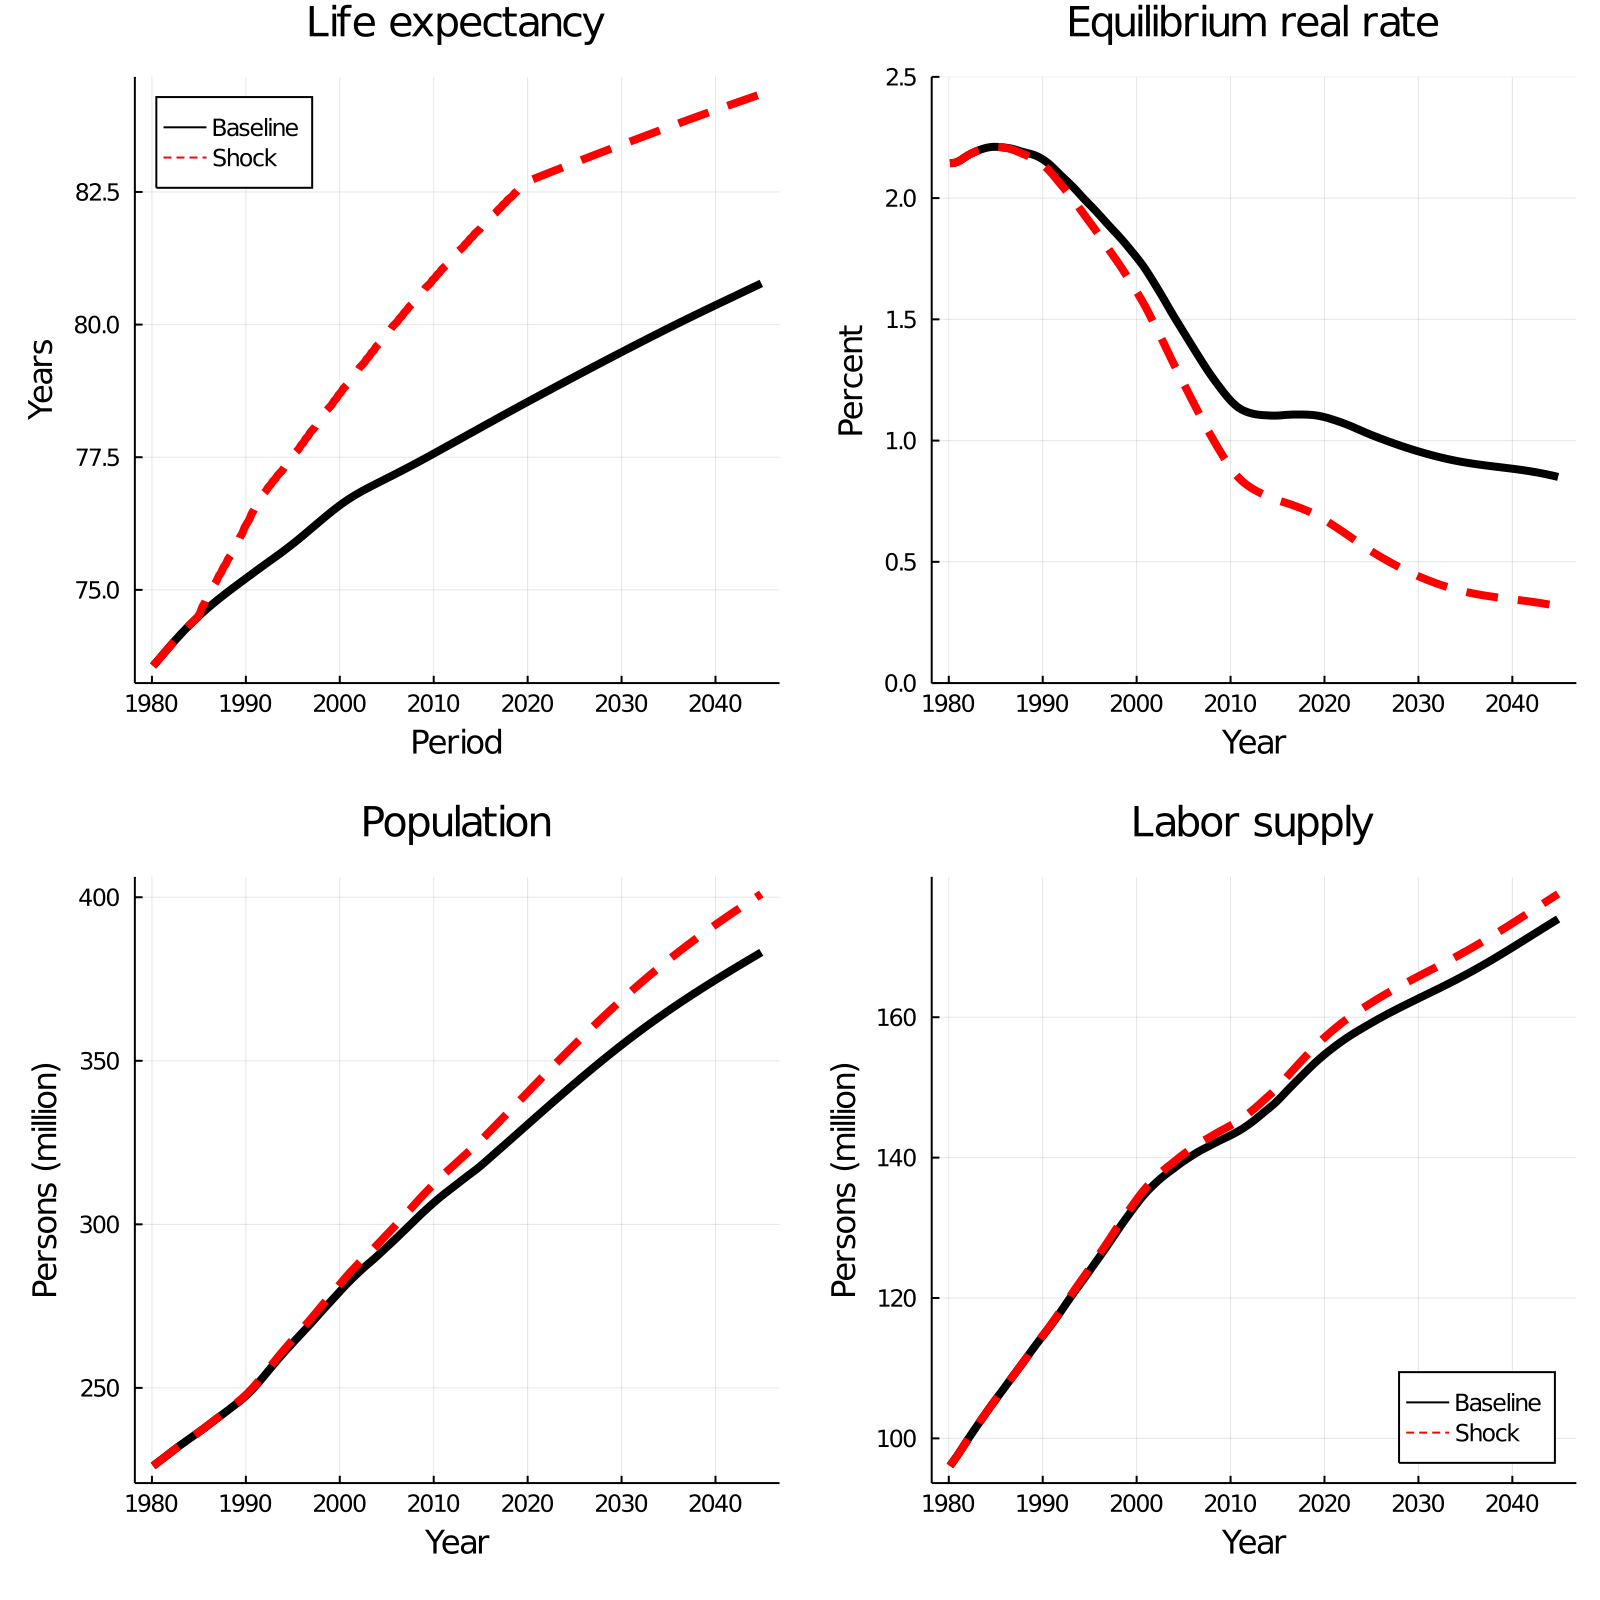

In [11]:
# Period indices
ageQ = 0.125:0.25:120;
periodQ = 1900.125:0.25:2400;
myper = (IRF_LE_beg-20):(IRF_LE_end+100)

# Check 2: impulse to average life expectancy (assuming mortality rates in cross section)
tmp1 = cumprod((1.0 .- data_NOIRF5.death_rate).^(0.25),dims=1)
tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
tmp_LE_NOIRF = (ageQ'*tmp2);
tmp1 = cumprod((1.0 .- data_IRF6.death_rate).^(0.25),dims=1)
tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
tmp_LE_IRF = (ageQ'*tmp2)';
figLE_LE=plot(periodQ[myper], [tmp_LE_NOIRF[myper] tmp_LE_IRF[myper]],
    xlabel = "Period",
    ylabel = "Years",
    title = "Life expectancy",
    label = ["Baseline" "Shock"],
    color=[:black :red],    
    linestyle = [:solid :dash :dot],
    linewidth = [4 4],
    legend =:topleft
)
display(figLE_LE)

# Check equilibrium interest rate
figARR_LE=plot(periodQ[myper], [solution_NOIRF5.ARR[myper] solution_IRF6.ARR[myper]],
    xlabel = "Year",
    ylabel = "Percent",
    title = "Equilibrium real rate",
    label = "",
#    label = [mylabel0 mylabel1 mylabel2],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    ylims=(0.0, 2.5),
    linewidth = [4 4 4],
    legend =:topright
)
display(figARR_LE)

figPOP_LE=plot(periodQ[myper], [sum(Population_NOIRF5,dims=1)[myper] sum(Population_IRF6,dims=1)[myper]]/1000000,
    xlabel = "Year",
    ylabel = "Persons (million)",
    title = "Population",
    label = "",
#    label = [mylabel0 mylabel1 mylabel2],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    linewidth = [4 4 4],
    legend =:bottomright
)
display(figPOP_LE)

figL_LE=plot(periodQ[myper], [solution_NOIRF5.L[myper] solution_IRF6.L[myper]]/1000000,
    xlabel = "Year",
    ylabel = "Persons (million)",
    title = "Labor supply",
    label = [mylabel5 mylabel6],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    linewidth = [4 4 4],
    legend =:bottomright
)
display(figL_LE)

figall_LE = plot(figLE_LE, figARR_LE, figPOP_LE, figL_LE, layout=(2, 2),size = (800, 800), dpi=200)
display(figall_LE)
savefig(figall_LE, "../Figures/Figure_LE_IRF_all.png")

In [13]:
# Looking at various measures of life expectancy in simulations

# A. Life expectancy using cross-section mortality rate 
tmp1 = cumprod((1.0 .- data_NOIRF5.death_rate).^(0.25),dims=1)
tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
LE_CS_NOIRF = (ageQ'*tmp2);
tmp1 = cumprod((1.0 .- data_IRF6.death_rate).^(0.25),dims=1)
tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
LE_CS_IRF = (ageQ'*tmp2)';

# B. Ex-post life expectancy at birth
LE_birth_NOIRF=zeros(size(data_NOIRF5.death_rate,2))
LE_birth_IRF=zeros(size(data_NOIRF5.death_rate,2))
for qq=1:(size(data_NOIRF5.death_rate,2)-size(ageQ,1)+1)
    tmp0 = diag(data_NOIRF5.death_rate[:,qq:(qq+size(ageQ,1)-1)]);
    tmp1 = cumprod((1.0 .- tmp0).^(0.25),dims=1)
    tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
    LE_birth_NOIRF[qq:qq] = (ageQ'*tmp2);
    tmp0 = diag(data_IRF6.death_rate[:,qq:(qq+size(ageQ,1)-1)]);
    tmp1 = cumprod((1.0 .- tmp0).^(0.25),dims=1)
    tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
    LE_birth_IRF[qq:qq] = (ageQ'*tmp2)';
end  
for qq=(size(data_NOIRF5.death_rate,2)-size(ageQ,1)+2):size(data_NOIRF5.death_rate,2)
    tmp0 = [diag(data_NOIRF5.death_rate[:,qq:end]); data_NOIRF5.death_rate[(size(data_NOIRF5.death_rate,2)-qq+2):end,end]]
    tmp1 = cumprod((1.0 .- tmp0).^(0.25),dims=1)
    tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
    LE_birth_NOIRF[qq:qq] = (ageQ'*tmp2);
    tmp0 = [diag(data_IRF6.death_rate[:,qq:end]); data_IRF6.death_rate[(size(data_IRF6.death_rate,2)-qq+2):end,end]]
    tmp1 = cumprod((1.0 .- tmp0).^(0.25),dims=1)
    tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
    LE_birth_IRF[qq:qq] = (ageQ'*tmp2)';
end

# C. Ex-ante life expectancy at birth
# Note: This measure takes into account the fact that households 
# are repeatedly surprised by the increase in life expectancy.
LE_birth_ante_NOIRF=zeros(size(data_NOIRF5.death_rate,2))
tmp_death_rate = [data_NOIRF5.death_rate data_NOIRF5.death_rate[:,end]*ones(1,size(ageQ,1))]
# At birth, no shock
for qq=1:size(data_NOIRF5.death_rate,2)
    tmp0 = diag(tmp_death_rate[:,qq:(qq+size(ageQ,1)-1)]);
    tmp1 = cumprod((1.0 .- tmp0).^(0.25),dims=1)
    tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
    LE_birth_ante_NOIRF[qq:qq] = (ageQ'*tmp2);
end

# At birth, at each shock
LE_birth_ante_IRF=LE_birth_ante_NOIRF; 
for qq=IRF_LE_beg:IRF_LE_end
    tmpi = Int64((IRF_LE_beg-1) + round((qq-(IRF_LE_beg-1))/(IRF_LE_end-(IRF_LE_beg-1))*(IRF_LE_tgt-(IRF_LE_beg-1))))
#    @printf("qq=%g ; tmpi=%g\n per[qq]=%g per[tmpi]=%g\n", qq, tmpi, periodQ[qq], periodQ[tmpi])
    tmp_death_rate[:,qq:(size(data_NOIRF5.death_rate,2)-(tmpi-qq))] = data_NOIRF5.death_rate[:,tmpi:end]
    if tmpi>qq
        tmp_death_rate[:,size(data_NOIRF5.death_rate,2)-(tmpi-qq)+1:size(data_NOIRF5.death_rate,2)] = data_NOIRF5.death_rate[:,end]*ones(1,tmpi-qq);
    end    
    tmp0 = diag(tmp_death_rate[:,qq:(qq+size(ageQ,1)-1)]);
    tmp1 = cumprod((1.0 .- tmp0).^(0.25),dims=1)
    tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
    LE_birth_ante_IRF[qq:qq] = (ageQ'*tmp2);
end 
for qq=(IRF_LE_end+1):size(LE_birth_ante_IRF,1)
    ## CHECK LINE BELOW
    tmp0 = diag(tmp_death_rate[:,qq:(qq+size(ageQ,1)-1)]);
    tmp1 = cumprod((1.0 .- tmp0).^(0.25),dims=1)
    tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
    LE_birth_ante_IRF[qq:qq] = (ageQ'*tmp2);
end 

In [14]:
# EG: Repeating these lines... Strange behavior.  LE_birth_ante_NOIRF gets overwritten by 
# LE_birth_ante_IRF even though there is no allocation statement. 

LE_birth_ante_NOIRF=zeros(size(data_NOIRF5.death_rate,2))
tmp_death_rate = [data_NOIRF5.death_rate data_NOIRF5.death_rate[:,end]*ones(1,size(ageQ,1))]
# At birth, no shock
for qq=1:size(data_NOIRF5.death_rate,2)
    tmp0 = diag(tmp_death_rate[:,qq:(qq+size(ageQ,1)-1)]);
    tmp1 = cumprod((1.0 .- tmp0).^(0.25),dims=1)
    tmp2 = [1.0 .- tmp1[1:1,:] ; tmp1[1:end-1,:] .- tmp1[2:end,:]]
    LE_birth_ante_NOIRF[qq:qq] = (ageQ'*tmp2);
end

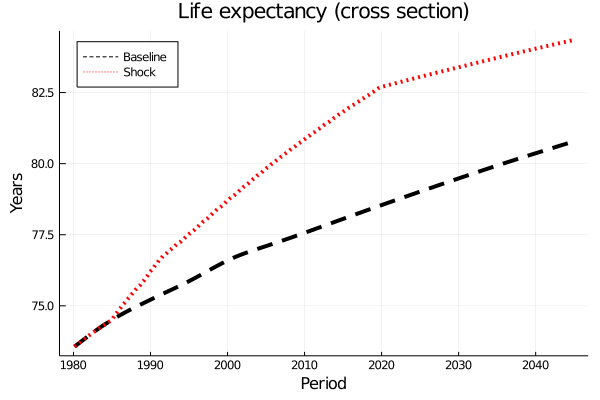

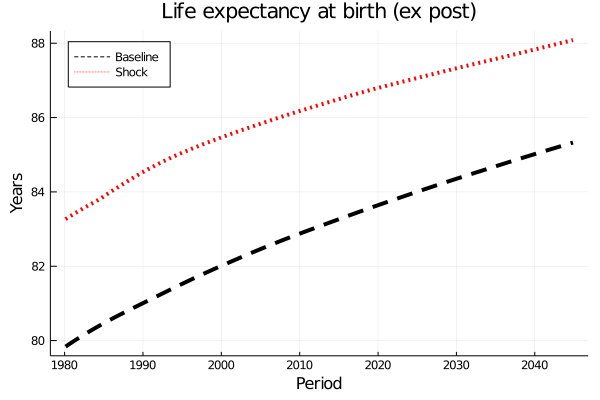

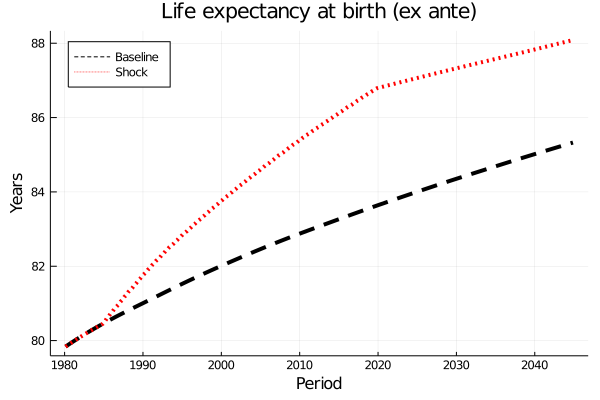

In [15]:
figLE_CS_LE=plot(periodQ[myper], [LE_CS_NOIRF[myper] LE_CS_IRF[myper]],
    xlabel = "Period",
    ylabel = "Years",
    title = "Life expectancy (cross section)",
    label = ["Baseline" "Shock"],
    color=[:black :red],    
    linestyle = [:dash :dot],
    linewidth = [4 4],
    legend =:topleft
)
display(figLE_CS_LE)

figLE_LE=plot(periodQ[myper], [LE_birth_NOIRF[myper] LE_birth_IRF[myper]],
    xlabel = "Period",
    ylabel = "Years",
    title = "Life expectancy at birth (ex post)",
    label = ["Baseline" "Shock"],
    color=[:black :red],    
    linestyle = [:dash :dot],
    linewidth = [4 4],
    legend =:topleft
)
display(figLE_LE)

figLE_birth_LE=plot(periodQ[myper], [LE_birth_ante_NOIRF[myper] LE_birth_ante_IRF[myper]],
    xlabel = "Period",
    ylabel = "Years",
    title = "Life expectancy at birth (ex ante)",
    label = ["Baseline" "Shock"],
    color=[:black :red],    
    linestyle = [:dash :dot],
    linewidth = [4 4],
    legend =:topleft
)
display(figLE_birth_LE)

figall_LE_measures = plot(figLE_CS_LE, figLE_LE, figLE_birth_LE, layout=(3, 1))
savefig(figall_LE, "../Figures/Figure_LE_all_measures.png")

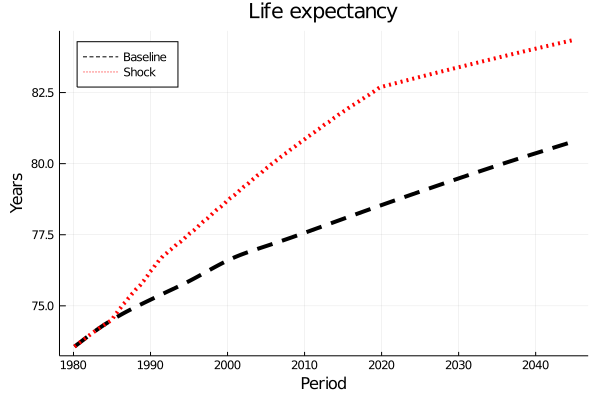

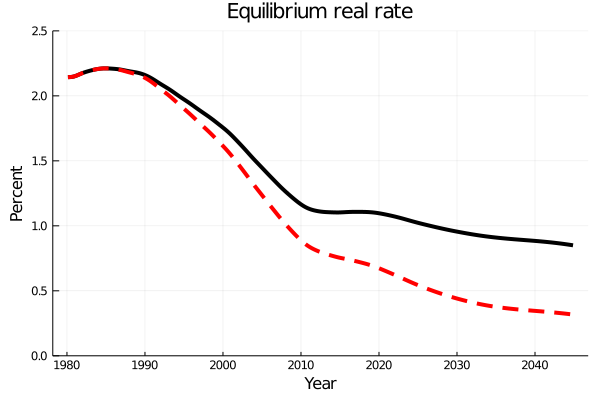

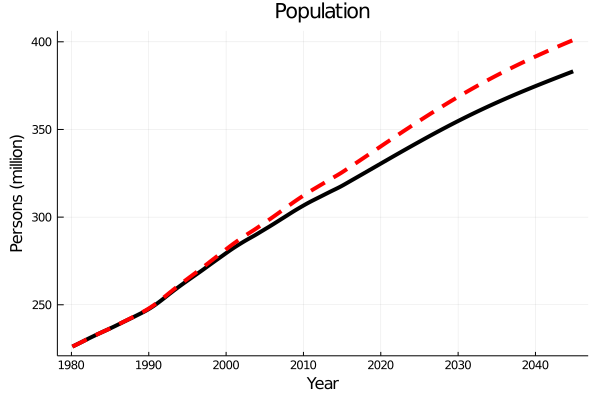

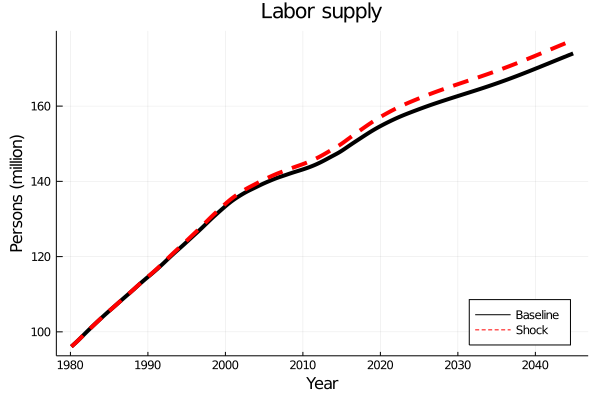

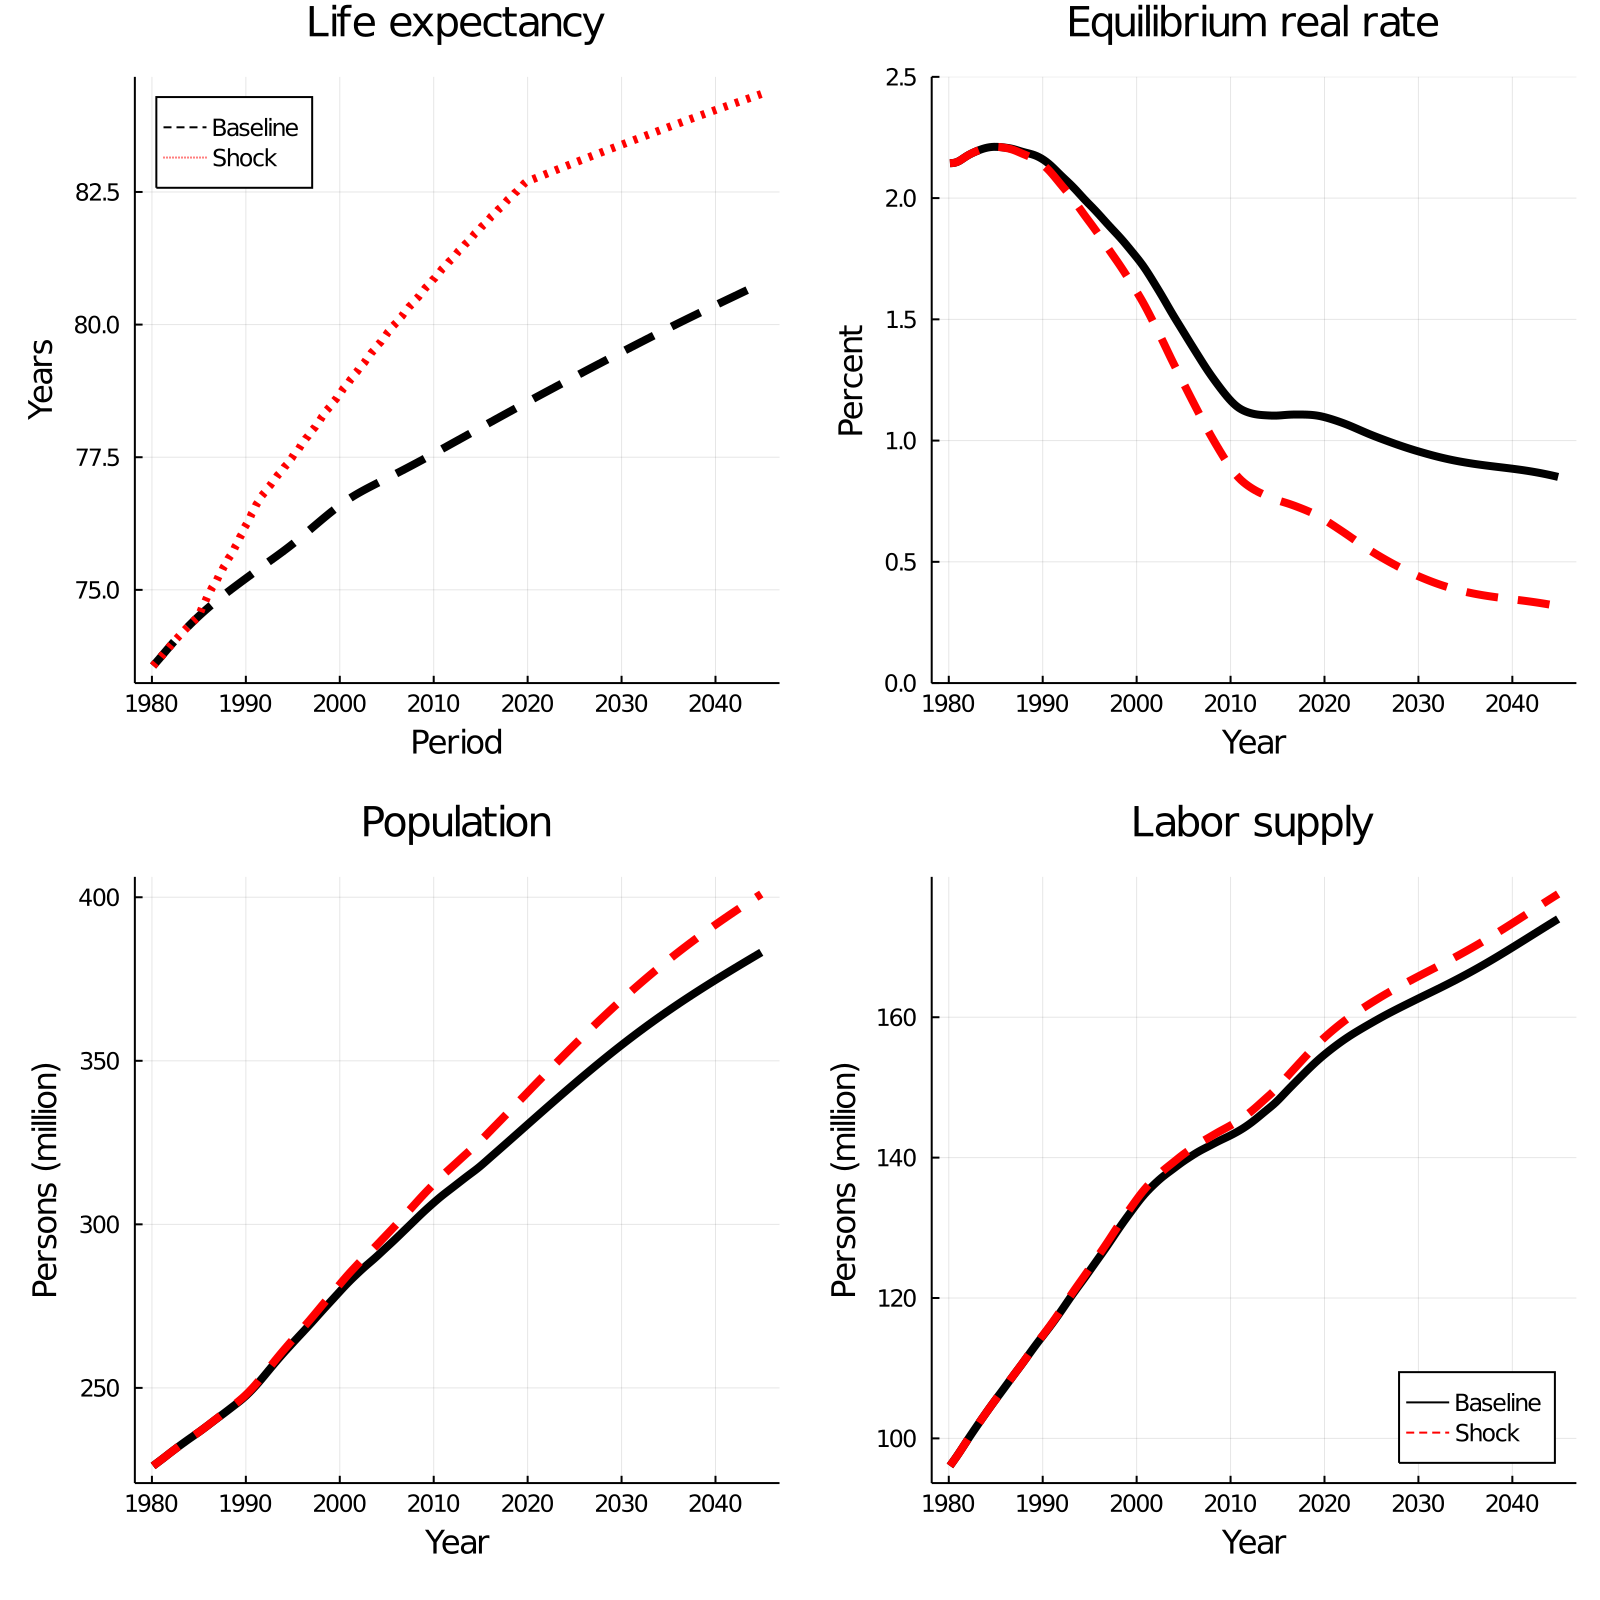

In [17]:
# Exhibit for referee

figLE_CS_LE2=plot(periodQ[myper], [LE_CS_NOIRF[myper] LE_CS_IRF[myper]],
#figLE_CS_LE2=plot(periodQ[myper], [LE_birth_ante_NOIRF[myper] LE_birth_ante_IRF[myper]],
    xlabel = "Period",
    ylabel = "Years",
    title = "Life expectancy",
    label = ["Baseline" "Shock"],
    color=[:black :red],    
    linestyle = [:dash :dot],
    linewidth = [4 4],
    legend =:topleft
)
display(figLE_CS_LE2)

# Check equilibrium interest rate
figARR_LE=plot(periodQ[myper], [solution_NOIRF5.ARR[myper] solution_IRF6.ARR[myper]],
    xlabel = "Year",
    ylabel = "Percent",
    title = "Equilibrium real rate",
    label = "",
#    label = [mylabel0 mylabel1 mylabel2],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    ylims=(0.0, 2.5),
    linewidth = [4 4 4],
    legend =:topright
)
display(figARR_LE)

figPOP_LE=plot(periodQ[myper], [sum(Population_NOIRF5,dims=1)[myper] sum(Population_IRF6,dims=1)[myper]]/1000000,
    xlabel = "Year",
    ylabel = "Persons (million)",
    title = "Population",
    label = "",
#    label = [mylabel0 mylabel1 mylabel2],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    linewidth = [4 4 4],
    legend =:bottomright
)
display(figPOP_LE)

figL_LE=plot(periodQ[myper], [solution_NOIRF5.L[myper] solution_IRF6.L[myper]]/1000000,
    xlabel = "Year",
    ylabel = "Persons (million)",
    title = "Labor supply",
    label = [mylabel5 mylabel6],
    color=[:black :red :blue],    
    linestyle = [:solid :dash :dot],
    linewidth = [4 4 4],
    legend =:bottomright
)
display(figL_LE)


figall_LE = plot(figLE_CS_LE2, figARR_LE, figPOP_LE, figL_LE, layout=(2, 2),size = (800, 800), dpi=200)
display(figall_LE)
savefig(figall_LE, "../Figures/Figure_LE_IRF_all.png")

# Saving the data to CSV
writedlm("../Figures/Figure_LE_IRF_all.csv", 
    [periodQ[1:800] LE_CS_NOIRF[1:800] LE_CS_IRF[1:800] solution_NOIRF5.ARR[1:800] solution_IRF6.ARR[1:800] [sum(Population_NOIRF5,dims=1)[1:800] sum(Population_IRF6,dims=1)[1:800]]/1000000 solution_NOIRF5.L[1:800] solution_IRF6.L[1:800]]
    , ',');
run(`chmod 664 ../Figures/Figure_LE_IRF_all.csv`);